# MadMiner particle physics tutorial

# Part 2b: Analyzing events at Delphes level

Johann Brehmer, Felix Kling, Irina Espejo, and Kyle Cranmer 2018-2019

In this second part of the tutorial, we'll generate events and extract the observables and weights from them. You have two options: In this notebook we'll do this with Delphes, in the alternative part 2a we stick to parton level.

## 0. Preparations

Before you execute this notebook, make sure you have working installations of MadGraph, Pythia, and Delphes.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import logging
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from madminer.core import MadMiner
from madminer.delphes import DelphesReader
from madminer.sampling import combine_and_shuffle
from madminer.plotting import plot_distributions


/usr/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# MadMiner output
logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.DEBUG
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

Please enter here the path to your MG5 root directory. This notebook assumes that you installed Delphes and Pythia through MG5.

## 5. Plot distributions

Let's see what our MC run produced:

21:55 madminer.analysis    INFO    Loading data from data/delphes_data_shuffled.h5
21:55 madminer.analysis    INFO    Found 1 parameters
21:55 madminer.analysis    DEBUG      kapz (LHA: NEWCOUP 1, maximal power in squared ME: (4,), range: (0.0, 2.0))
21:55 madminer.analysis    INFO    Did not find nuisance parameters
21:55 madminer.analysis    INFO    Found 6 benchmarks, of which 6 physical
21:55 madminer.analysis    DEBUG      no-higgs: kapz = 0.00e+00
21:55 madminer.analysis    DEBUG      0.8_k: kapz = 0.80
21:55 madminer.analysis    DEBUG      sm: kapz = 1.00
21:55 madminer.analysis    DEBUG      1.2_k: kapz = 1.20
21:55 madminer.analysis    DEBUG      1.5_k: kapz = 1.50
21:55 madminer.analysis    DEBUG      1.35_k: kapz = 1.35
21:55 madminer.analysis    INFO    Found 35 observables
21:55 madminer.analysis    DEBUG      0 delta_phi_jj
21:55 madminer.analysis    DEBUG      1 delta_eta_jj
21:55 madminer.analysis    DEBUG      2 invmass_jj
21:55 madminer.analysis    DEBUG      3 m4l
21

21:56 madminer.plotting    DEBUG   Ranges for observable eta_l1: min = [-2.397008149241374, -2.4267092137955557, -2.4274785102863223, -2.385499104014739, -2.311593985847158], max = [2.4250848610191302, 2.4426796544848934, 2.4452159555017388, 2.419898578476903, 2.3396983946370025]
21:56 madminer.plotting    DEBUG   Plotting panel 12: observable 12, label phi_l1
21:56 madminer.plotting    DEBUG   Ranges for observable phi_l1: min = [-3.141592502593994, -3.141592502593994, -3.141592502593994, -3.141592502593994, -3.141592502593994], max = [3.141591787338257, 3.141591787338257, 3.141591787338257, 3.141591787338257, 3.141591787338257]
21:56 madminer.plotting    DEBUG   Plotting panel 13: observable 13, label e_l2
21:56 madminer.plotting    DEBUG   Ranges for observable e_l2: min = [14.547091637587991, 14.547091637587991, 14.547091637587991, 14.547091637587991, 14.547091637587991], max = [760.601892730772, 676.9479193600099, 664.2612296450925, 770.6454204066258, 849.3439697009092]
21:56 madm

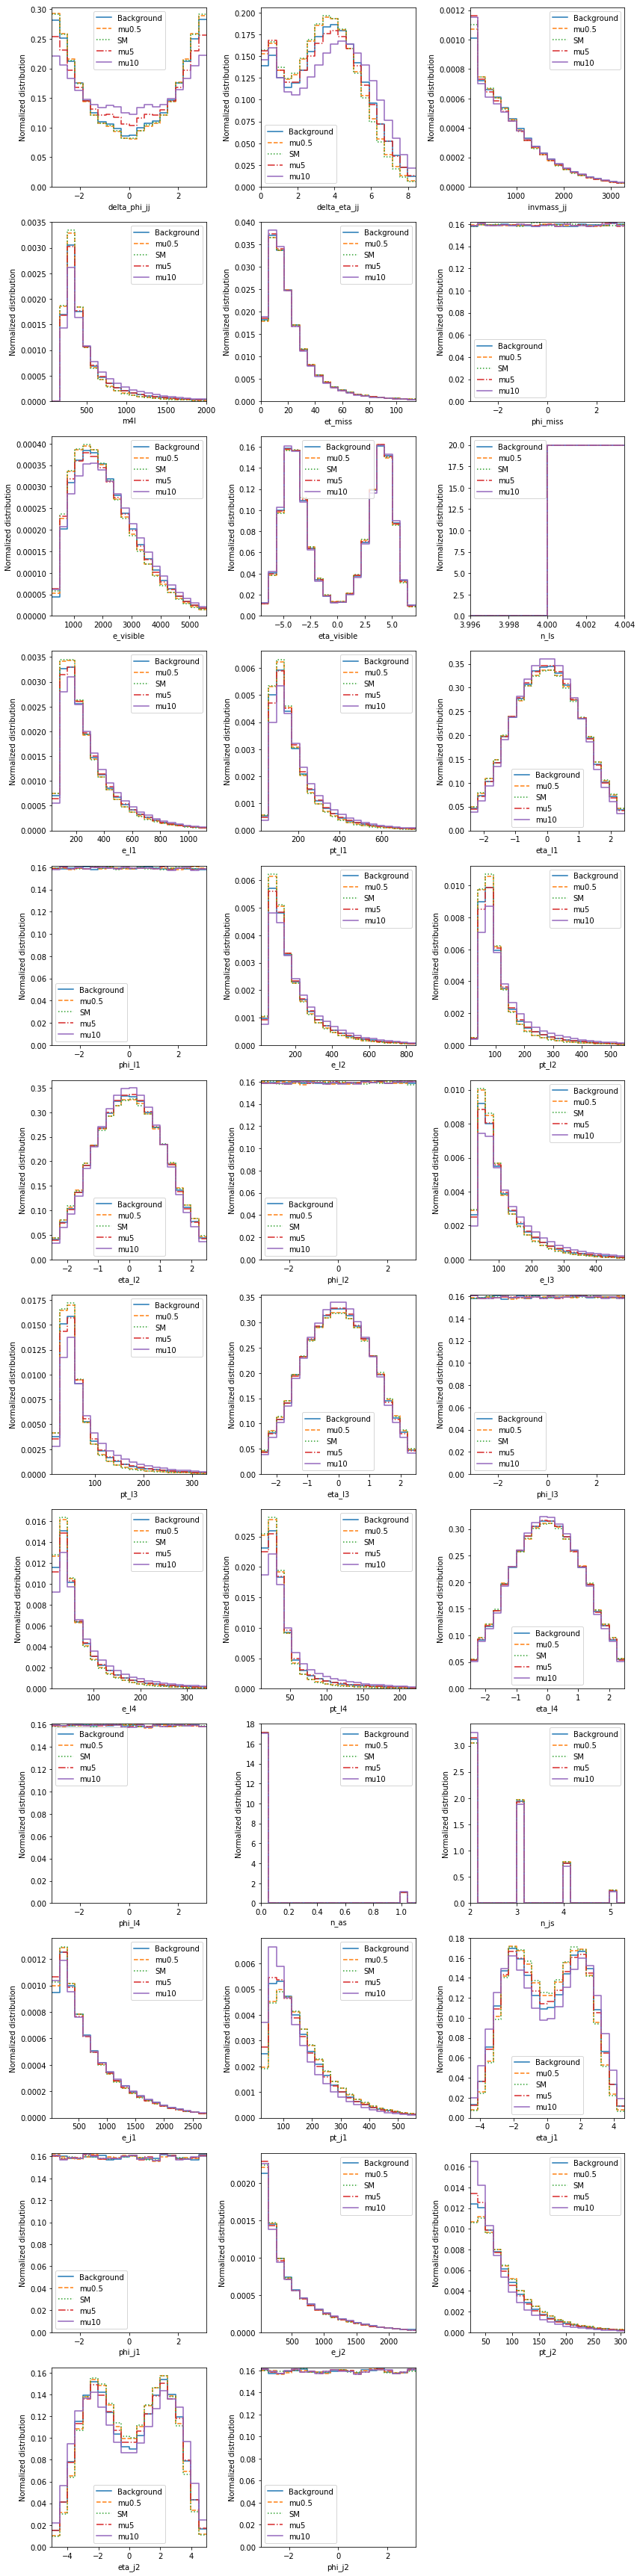

In [3]:
_ = plot_distributions(
    filename='data/delphes_data_shuffled.h5',
    parameter_points=['no-higgs', [0.5**0.25], 'sm', [5.**0.25], [10.**0.25]],
    line_labels=['Background', 'mu0.5', 'SM', 'mu5', 'mu10'],
    uncertainties='none',
    n_bins=20,
    n_cols=3,
    normalize=True,
)

18:07 madminer.analysis    INFO    Loading data from data/delphes_data_shuffled.h5
18:07 madminer.analysis    INFO    Found 1 parameters
18:07 madminer.analysis    DEBUG      kapz (LHA: NEWCOUP 1, maximal power in squared ME: (4,), range: (0.0, 2.0))
18:07 madminer.analysis    INFO    Did not find nuisance parameters
18:07 madminer.analysis    INFO    Found 6 benchmarks, of which 6 physical
18:07 madminer.analysis    DEBUG      no-higgs: kapz = 0.00e+00
18:07 madminer.analysis    DEBUG      0.8_k: kapz = 0.80
18:07 madminer.analysis    DEBUG      sm: kapz = 1.00
18:07 madminer.analysis    DEBUG      1.2_k: kapz = 1.20
18:07 madminer.analysis    DEBUG      1.5_k: kapz = 1.50
18:07 madminer.analysis    DEBUG      1.35_k: kapz = 1.35
18:07 madminer.analysis    INFO    Found 35 observables
18:07 madminer.analysis    DEBUG      0 delta_phi_jj
18:07 madminer.analysis    DEBUG      1 delta_eta_jj
18:07 madminer.analysis    DEBUG      2 invmass_jj
18:07 madminer.analysis    DEBUG      3 m4l
18

18:08 madminer.plotting    DEBUG   Plotting panel 12: observable 12, label phi_l1
18:08 madminer.plotting    DEBUG   Ranges for observable phi_l1: min = [-3.141592502593994, -3.141592502593994, -3.141592502593994, -3.141592502593994, -3.141592502593994], max = [3.141591787338257, 3.141591787338257, 3.141591787338257, 3.141591787338257, 3.141591787338257]
18:08 madminer.plotting    DEBUG   Plotting panel 13: observable 13, label e_l2
18:08 madminer.plotting    DEBUG   Ranges for observable e_l2: min = [14.547091637587991, 14.547091637587991, 14.547091637587991, 14.547091637587991, 14.547091637587991], max = [723.1021371435405, 669.9430590648834, 656.8313670997225, 723.7486559274469, 777.885987462359]
18:08 madminer.plotting    DEBUG   Plotting panel 14: observable 14, label pt_l2
18:08 madminer.plotting    DEBUG   Ranges for observable pt_l2: min = [12.23784637451172, 12.23784637451172, 12.23784637451172, 12.23784637451172, 12.23784637451172], max = [455.58461787857397, 397.205897280041

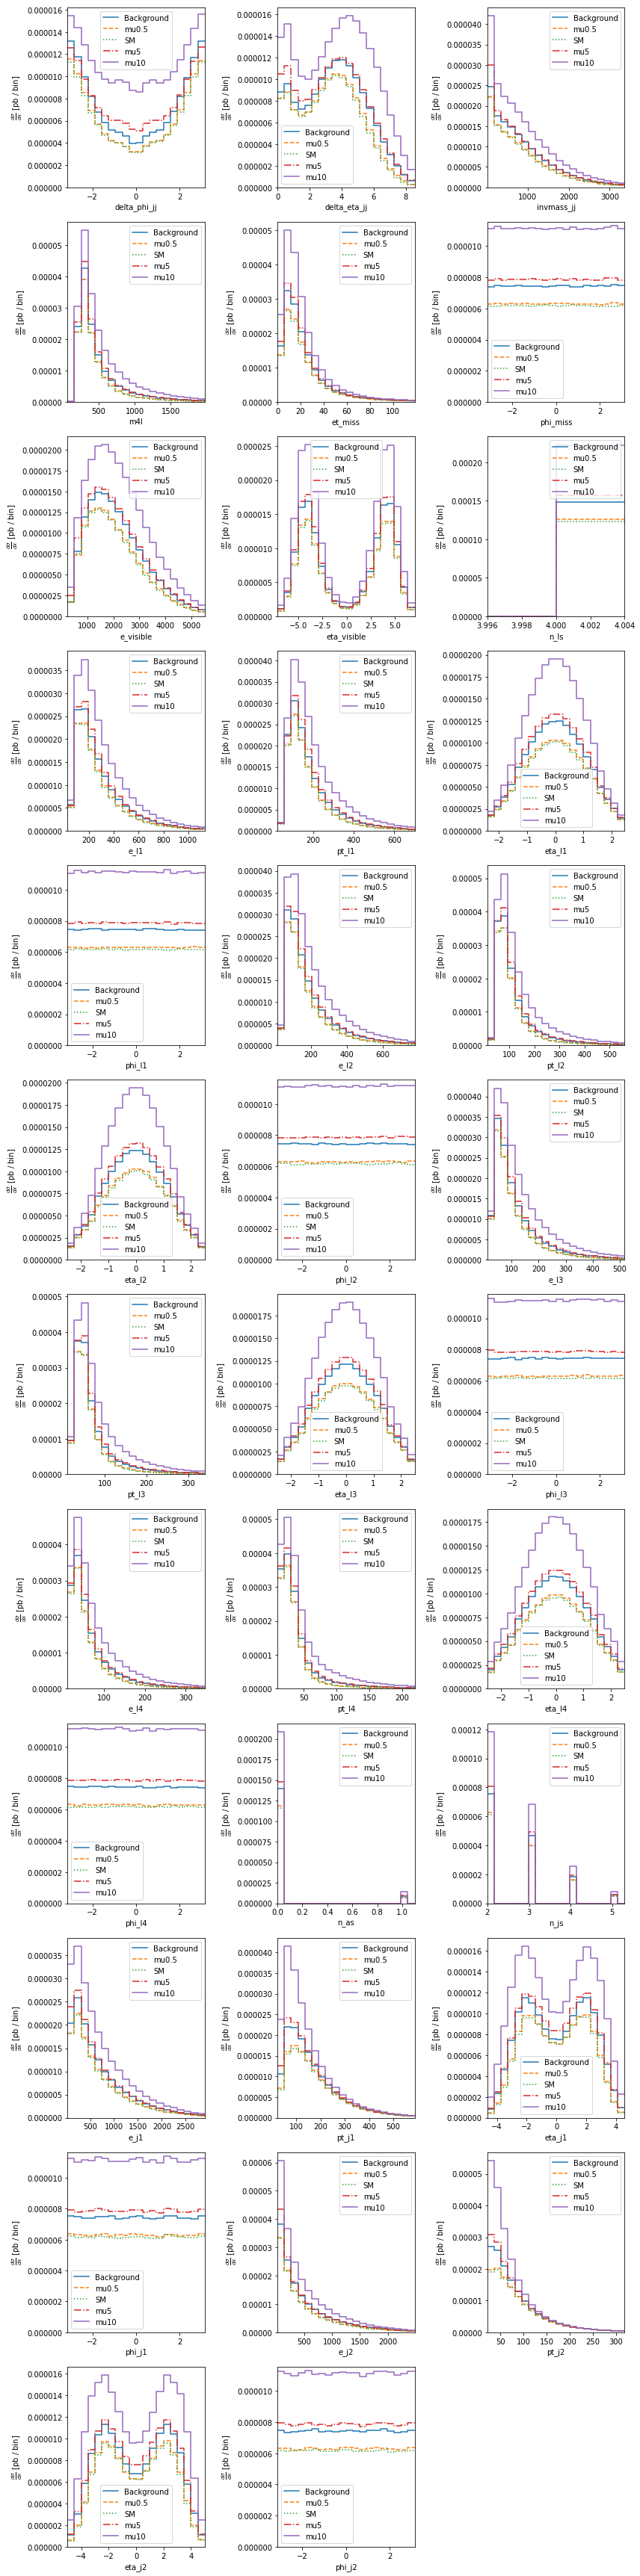

In [4]:
_ = plot_distributions(
    filename='data/delphes_data_shuffled.h5',
    parameter_points=['no-higgs', [0.5**0.25], 'sm', [5.**0.25], [10.**0.25]],
    line_labels=['Background', 'mu0.5', 'SM', 'mu5', 'mu10'],
    uncertainties='none',
    n_bins=20,
    n_cols=3,
    normalize=False,
)

# Find mu that looks same as mu=0

18:08 madminer.analysis    INFO    Loading data from data/delphes_data_shuffled.h5
18:08 madminer.analysis    INFO    Found 1 parameters
18:08 madminer.analysis    DEBUG      kapz (LHA: NEWCOUP 1, maximal power in squared ME: (4,), range: (0.0, 2.0))
18:08 madminer.analysis    INFO    Did not find nuisance parameters
18:08 madminer.analysis    INFO    Found 6 benchmarks, of which 6 physical
18:08 madminer.analysis    DEBUG      no-higgs: kapz = 0.00e+00
18:08 madminer.analysis    DEBUG      0.8_k: kapz = 0.80
18:08 madminer.analysis    DEBUG      sm: kapz = 1.00
18:08 madminer.analysis    DEBUG      1.2_k: kapz = 1.20
18:08 madminer.analysis    DEBUG      1.5_k: kapz = 1.50
18:08 madminer.analysis    DEBUG      1.35_k: kapz = 1.35
18:08 madminer.analysis    INFO    Found 35 observables
18:08 madminer.analysis    DEBUG      0 delta_phi_jj
18:08 madminer.analysis    DEBUG      1 delta_eta_jj
18:08 madminer.analysis    DEBUG      2 invmass_jj
18:08 madminer.analysis    DEBUG      3 m4l
18

18:09 madminer.plotting    DEBUG   Plotting panel 10: observable 10, label pt_l1
18:09 madminer.plotting    DEBUG   Ranges for observable pt_l1: min = [22.39999389648438, 22.39999389648438, 22.39999389648438, 22.39999389648438, 22.39999389648438, 22.39999389648438, 22.39999389648438], max = [657.4957607280936, 626.7601991394223, 612.4064476123813, 609.829610886352, 623.2893857994537, 654.4554698358473, 692.6685188137562]
18:09 madminer.plotting    DEBUG   Plotting panel 11: observable 11, label eta_l1
18:09 madminer.plotting    DEBUG   Ranges for observable eta_l1: min = [-2.4129555508554636, -2.4370456688088207, -2.4413494368676774, -2.4413669095084356, -2.4371077778474475, -2.4255517958946013, -2.377541044915221], max = [2.388642761866409, 2.4145133857794163, 2.4238597589247415, 2.4205586753766775, 2.412597768890585, 2.3928847850948665, 2.3344725209754174]
18:09 madminer.plotting    DEBUG   Plotting panel 12: observable 12, label phi_l1
18:09 madminer.plotting    DEBUG   Ranges for o

18:09 madminer.plotting    DEBUG   Plotting panel 30: observable 30, label phi_j1
18:09 madminer.plotting    DEBUG   Ranges for observable phi_j1: min = [-3.141592025756836, -3.141592025756836, -3.141592025756836, -3.141592025756836, -3.141592025756836, -3.141592025756836, -3.141592025756836], max = [3.141591787338257, 3.141591787338257, 3.141591787338257, 3.141591787338257, 3.141591787338257, 3.141591787338257, 3.141591787338257]
18:09 madminer.plotting    DEBUG   Plotting panel 31: observable 31, label e_j2
18:09 madminer.plotting    DEBUG   Ranges for observable e_j2: min = [23.018190332135802, 23.018190332135802, 23.018190332135802, 23.018190332135802, 23.018190332135802, 23.018190332135802, 23.018190332135802], max = [2385.8139142771706, 2414.7235822246416, 2423.4867556303916, 2424.166908222663, 2422.8108932818936, 2393.607261957097, 2371.238236340593]
18:09 madminer.plotting    DEBUG   Plotting panel 32: observable 32, label pt_j2
18:09 madminer.plotting    DEBUG   Ranges for obs

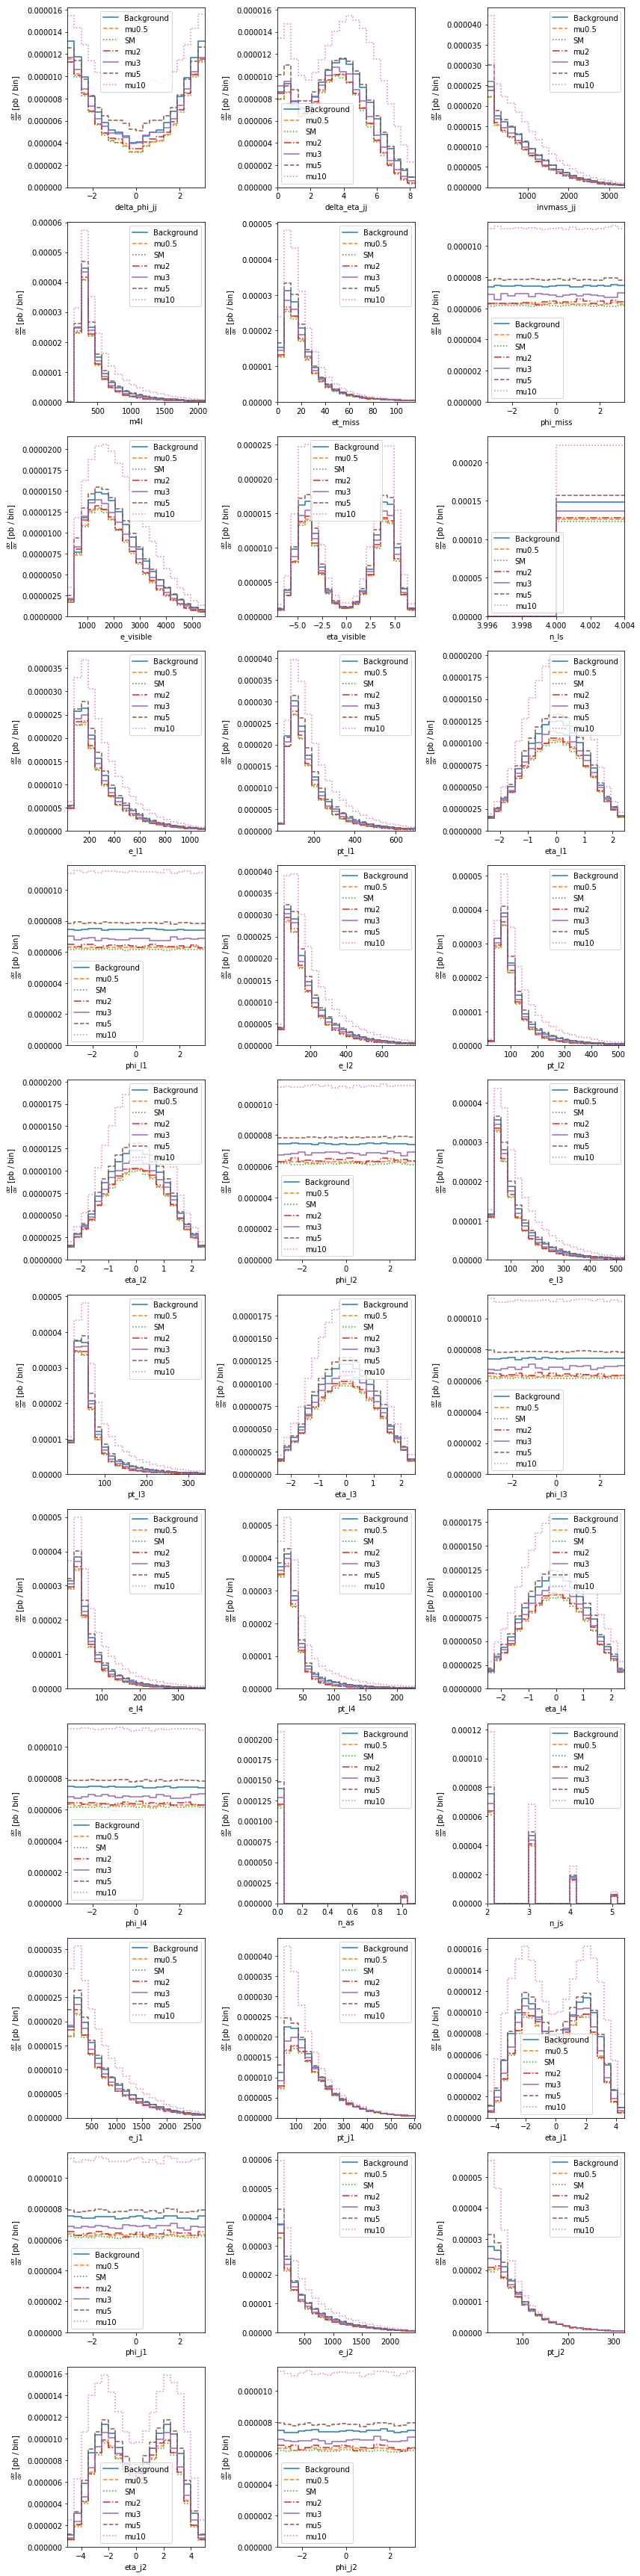

In [5]:
_ = plot_distributions(
    filename='data/delphes_data_shuffled.h5',
    parameter_points=['no-higgs', [0.5**0.25], 'sm', [2.**0.25], [3.**0.25], [5.**0.25], [10.**0.25]],
    line_labels=['Background', 'mu0.5', 'SM', 'mu2', 'mu3', 'mu5', 'mu10'],
    uncertainties='none',
    n_bins=20,
    n_cols=3,
    normalize=False,
)

18:09 madminer.analysis    INFO    Loading data from data/delphes_data_shuffled.h5
18:09 madminer.analysis    INFO    Found 1 parameters
18:09 madminer.analysis    DEBUG      kapz (LHA: NEWCOUP 1, maximal power in squared ME: (4,), range: (0.0, 2.0))
18:09 madminer.analysis    INFO    Did not find nuisance parameters
18:09 madminer.analysis    INFO    Found 6 benchmarks, of which 6 physical
18:09 madminer.analysis    DEBUG      no-higgs: kapz = 0.00e+00
18:09 madminer.analysis    DEBUG      0.8_k: kapz = 0.80
18:09 madminer.analysis    DEBUG      sm: kapz = 1.00
18:09 madminer.analysis    DEBUG      1.2_k: kapz = 1.20
18:09 madminer.analysis    DEBUG      1.5_k: kapz = 1.50
18:09 madminer.analysis    DEBUG      1.35_k: kapz = 1.35
18:09 madminer.analysis    INFO    Found 35 observables
18:09 madminer.analysis    DEBUG      0 delta_phi_jj
18:09 madminer.analysis    DEBUG      1 delta_eta_jj
18:09 madminer.analysis    DEBUG      2 invmass_jj
18:09 madminer.analysis    DEBUG      3 m4l
18

18:10 madminer.plotting    DEBUG   Plotting panel 10: observable 10, label pt_l1
18:10 madminer.plotting    DEBUG   Ranges for observable pt_l1: min = [22.39999389648438, 22.39999389648438, 22.39999389648438, 22.39999389648438, 22.39999389648438, 22.39999389648438, 22.39999389648438], max = [627.5209036103229, 599.5543322808612, 593.4486789750291, 594.8618452268516, 604.055179182259, 626.6934148665684, 677.5495294166312]
18:10 madminer.plotting    DEBUG   Plotting panel 11: observable 11, label eta_l1
18:10 madminer.plotting    DEBUG   Ranges for observable eta_l1: min = [-2.3800187189844557, -2.4201233759523464, -2.4214851374300728, -2.4128753788218846, -2.3872828951200535, -2.369449498540882, -2.325109688597431], max = [2.4217840643230506, 2.4389473498570866, 2.442459329504455, 2.4381542068423316, 2.433005747720974, 2.4148115826686674, 2.3411609275319343]
18:10 madminer.plotting    DEBUG   Plotting panel 12: observable 12, label phi_l1
18:10 madminer.plotting    DEBUG   Ranges for ob

18:10 madminer.plotting    DEBUG   Plotting panel 30: observable 30, label phi_j1
18:10 madminer.plotting    DEBUG   Ranges for observable phi_j1: min = [-3.141592025756836, -3.141592025756836, -3.141592025756836, -3.141592025756836, -3.141592025756836, -3.141592025756836, -3.141592025756836], max = [3.141591787338257, 3.141591787338257, 3.141591787338257, 3.141591787338257, 3.141591787338257, 3.141591787338257, 3.141591787338257]
18:10 madminer.plotting    DEBUG   Plotting panel 31: observable 31, label e_j2
18:10 madminer.plotting    DEBUG   Ranges for observable e_j2: min = [23.018190332135802, 23.018190332135802, 23.018190332135802, 23.018190332135802, 23.018190332135802, 23.018190332135802, 23.018190332135802], max = [2387.580429865344, 2417.8127330797524, 2417.232842753648, 2400.2440056059454, 2385.5611918568125, 2371.718046768881, 2333.0539127459956]
18:10 madminer.plotting    DEBUG   Plotting panel 32: observable 32, label pt_j2
18:10 madminer.plotting    DEBUG   Ranges for obs

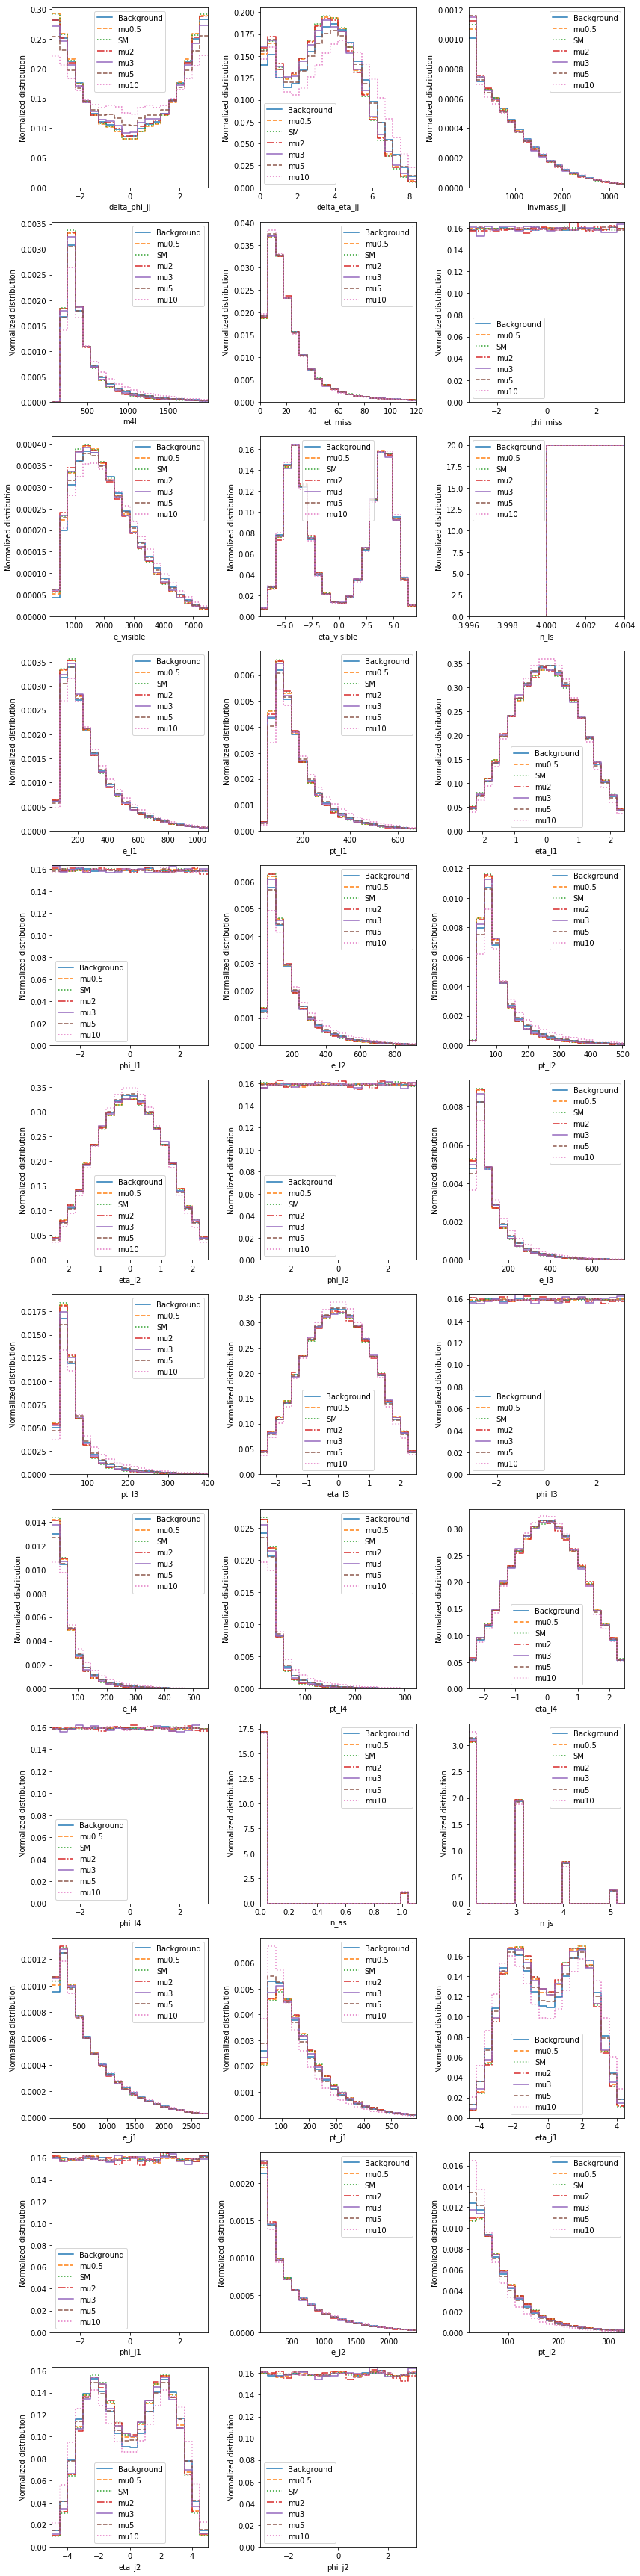

In [6]:
_ = plot_distributions(
    filename='data/delphes_data_shuffled.h5',
    parameter_points=['no-higgs', [0.5**0.25], 'sm', [2.**0.25], [3.**0.25], [5.**0.25], [10.**0.25]],
    line_labels=['Background', 'mu0.5', 'SM', 'mu2', 'mu3', 'mu5', 'mu10'],
    uncertainties='none',
    n_bins=20,
    n_cols=3,
    normalize=True,
)

19:05 madminer.analysis    INFO    Loading data from data/delphes_data_shuffled.h5
19:05 madminer.analysis    INFO    Found 1 parameters
19:05 madminer.analysis    DEBUG      kapz (LHA: NEWCOUP 1, maximal power in squared ME: (4,), range: (0.0, 2.0))
19:05 madminer.analysis    INFO    Did not find nuisance parameters
19:05 madminer.analysis    INFO    Found 6 benchmarks, of which 6 physical
19:05 madminer.analysis    DEBUG      no-higgs: kapz = 0.00e+00
19:05 madminer.analysis    DEBUG      0.8_k: kapz = 0.80
19:05 madminer.analysis    DEBUG      sm: kapz = 1.00
19:05 madminer.analysis    DEBUG      1.2_k: kapz = 1.20
19:05 madminer.analysis    DEBUG      1.5_k: kapz = 1.50
19:05 madminer.analysis    DEBUG      1.35_k: kapz = 1.35
19:05 madminer.analysis    INFO    Found 35 observables
19:05 madminer.analysis    DEBUG      0 delta_phi_jj
19:05 madminer.analysis    DEBUG      1 delta_eta_jj
19:05 madminer.analysis    DEBUG      2 invmass_jj
19:05 madminer.analysis    DEBUG      3 m4l
19

19:06 madminer.plotting    DEBUG   Plotting panel 13: observable 13, label e_l2
19:06 madminer.plotting    DEBUG   Ranges for observable e_l2: min = [14.547091637587991, 14.547091637587991, 14.547091637587991, 14.547091637587991], max = [745.1226846755754, 688.0017018826873, 735.7507399552492, 758.8083982665768]
19:06 madminer.plotting    DEBUG   Plotting panel 14: observable 14, label pt_l2
19:06 madminer.plotting    DEBUG   Ranges for observable pt_l2: min = [12.23784637451172, 12.23784637451172, 12.23784637451172, 12.23784637451172], max = [457.93364956195694, 395.7593251542754, 449.56951241995415, 467.71717694132315]
19:06 madminer.plotting    DEBUG   Plotting panel 15: observable 15, label eta_l2
19:06 madminer.plotting    DEBUG   Ranges for observable eta_l2: min = [-2.467207898353102, -2.490024860393004, -2.4742644133067957, -2.4640294494031254], max = [2.469439545650822, 2.4861541453586753, 2.463347627437619, 2.458961916051793]
19:06 madminer.plotting    DEBUG   Plotting panel 

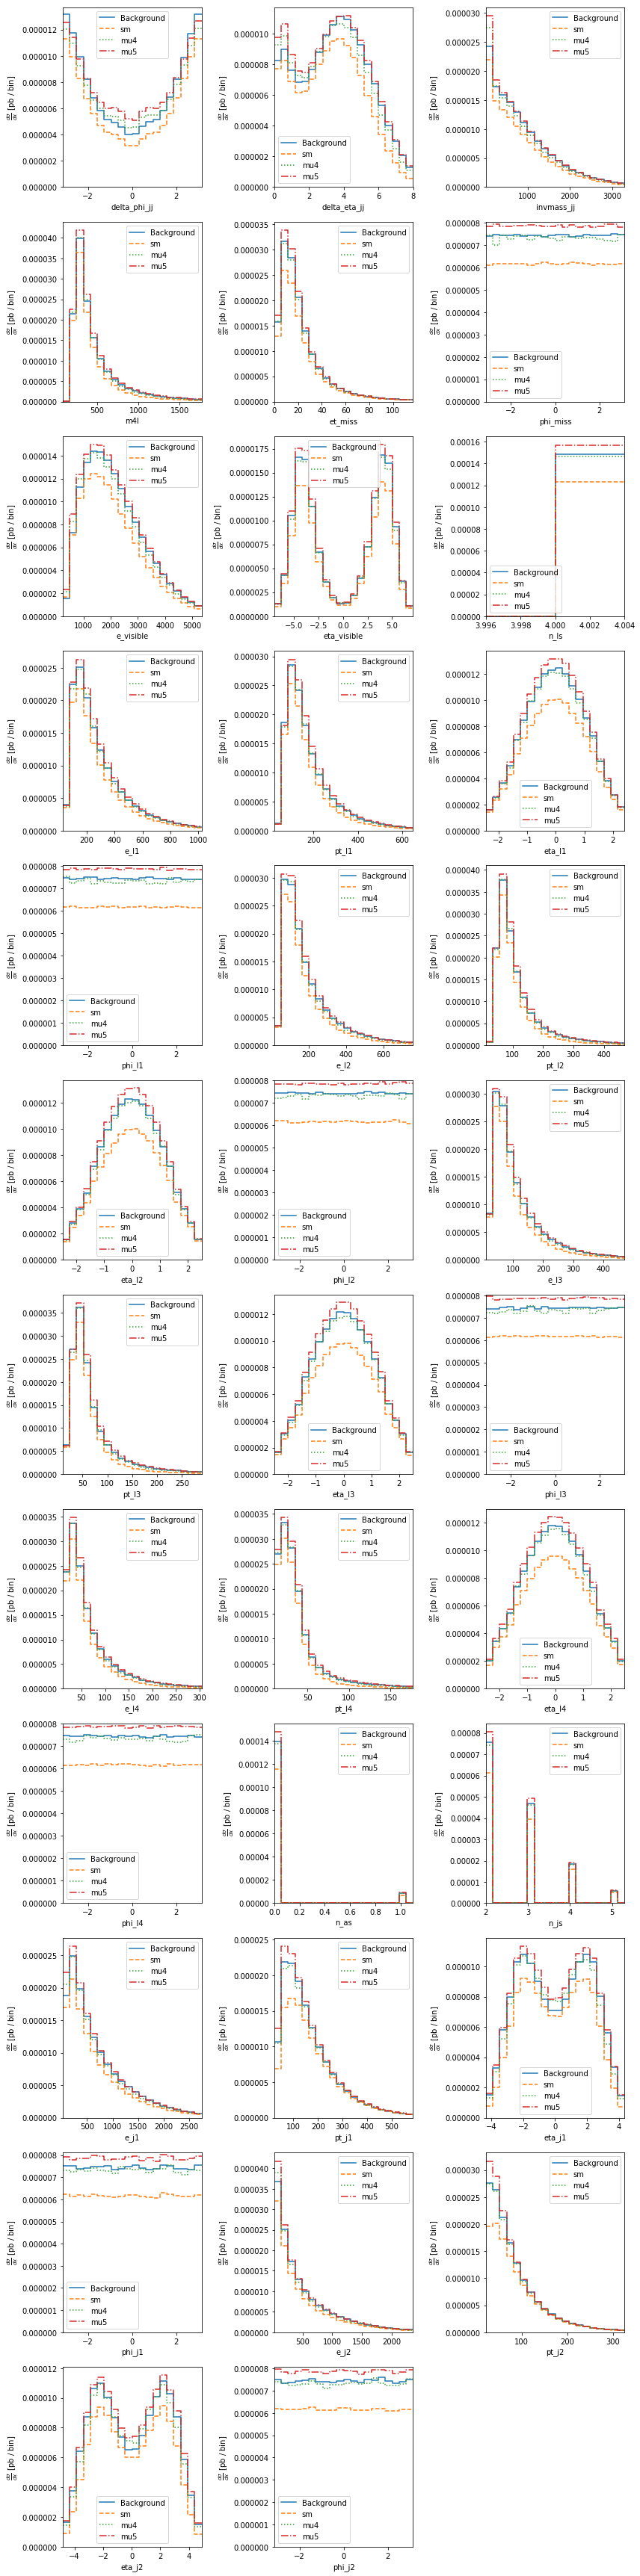

In [3]:
parameter_points = np.array([[0.], [1.], [4.], [5.]])**0.25
_ = plot_distributions(
    filename='data/delphes_data_shuffled.h5',
    #observables = ["m4l"],
    parameter_points=parameter_points,
    line_labels=['Background', 'sm', 'mu4', 'mu5'],
    uncertainties='none',
    n_bins=20,
    n_cols=3,
    normalize=False,
    #sample_only_from_closest_benchmark=False,
)
plt.savefig("mu4SameBackground.pdf")